# V Short-list promising models

This notebook assumes, that notebook 4_prepare_California_housing.ipynb (Version from 9th March 6:39pm) has been successfully executed.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
import os
result_path = '../results'
get_path = lambda fn: os.path.join(result_path, fn)
get_path('X_train.csv')

'../results/X_train.csv'

In [3]:
X_train = pd.read_csv(get_path('X_train.csv'), index_col=0)
y_train = pd.read_csv(get_path('y_train.csv'), index_col=0, )
X_train.shape, y_train.shape

((16512, 16), (16512, 1))

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 1862 to 14525
Data columns (total 16 columns):
num_pipeline__longitude                   16512 non-null float64
num_pipeline__latitude                    16512 non-null float64
num_pipeline__housing_median_age          16512 non-null float64
num_pipeline__total_rooms                 16512 non-null float64
num_pipeline__total_bedrooms              16512 non-null float64
num_pipeline__population                  16512 non-null float64
num_pipeline__households                  16512 non-null float64
num_pipeline__median_income               16512 non-null float64
num_pipeline__rooms_per_household         16512 non-null float64
num_pipeline__population_per_household    16512 non-null float64
num_pipeline__bedrooms_per_room           16512 non-null float64
cat_pipeline__<1H OCEAN                   16512 non-null float64
cat_pipeline__INLAND                      16512 non-null float64
cat_pipeline__ISLAND                      1

In [5]:
y_train.head()

,median_house_value
1862,103100.0
18832,62000.0
2488,60400.0
7637,218800.0
6941,190300.0


# V.1 Train many quick and dirty models from different categories

### Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5].copy()
some_labels

,median_house_value
1862,103100.0
18832,62000.0
2488,60400.0
7637,218800.0
6941,190300.0


In [8]:
some_labels['lin_reg'] = lin_reg.predict(some_data)
some_labels

,median_house_value,lin_reg
1862,103100.0,34237.426840
18832,62000.0,56740.749372
2488,60400.0,91260.890218
7637,218800.0,205728.067852
6941,190300.0,171932.014917


In [9]:
pd.Series(data=np.ravel(lin_reg.coef_), index=X_train.columns)

num_pipeline__longitude                   -56289.463814
num_pipeline__latitude                    -57085.821968
num_pipeline__housing_median_age           13450.030958
num_pipeline__total_rooms                   -259.622461
num_pipeline__total_bedrooms                3827.018969
num_pipeline__population                  -45231.438019
num_pipeline__households                   46402.596313
num_pipeline__median_income                75639.313044
num_pipeline__rooms_per_household           6985.146674
num_pipeline__population_per_household       937.948301
num_pipeline__bedrooms_per_room            11054.189683
cat_pipeline__<1H OCEAN                   -35392.929144
cat_pipeline__INLAND                      -71178.814195
cat_pipeline__ISLAND                      179033.034197
cat_pipeline__NEAR BAY                    -40804.389076
cat_pipeline__NEAR OCEAN                  -31656.901783
dtype: float64

### Decision Tree

In [10]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
some_labels['tree_reg'] = tree_reg.predict(some_data)
some_labels

,median_house_value,lin_reg,tree_reg
1862,103100.0,34237.426840,103100.0
18832,62000.0,56740.749372,62000.0
2488,60400.0,91260.890218,60400.0
7637,218800.0,205728.067852,218800.0
6941,190300.0,171932.014917,190300.0


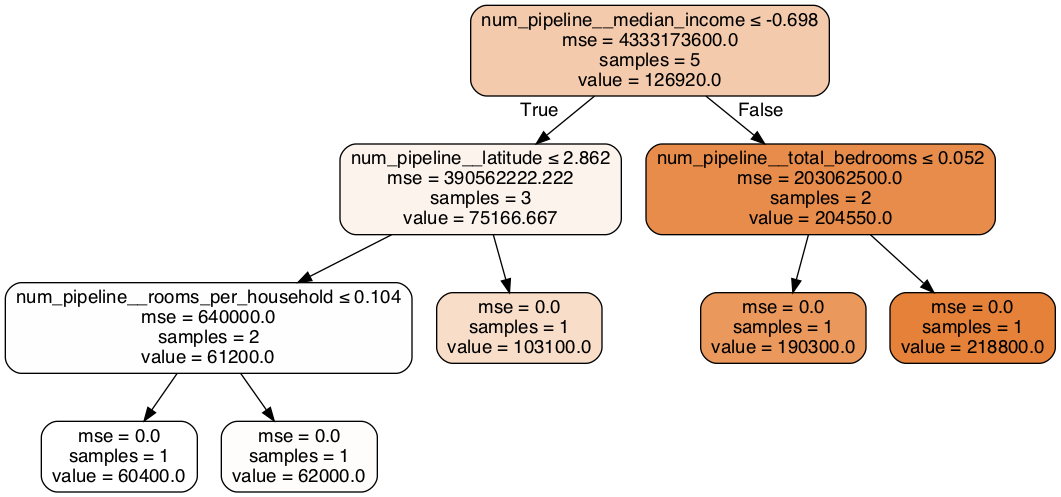

In [11]:
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = StringIO()
tree_example = DecisionTreeRegressor()
tree_example.fit(some_data, y_train.iloc[:5])
export_graphviz(tree_example, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

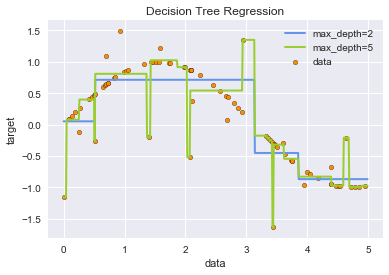

In [13]:
# from http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()

### Random Forrest

In [12]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, np.ravel(y_train))
some_labels['forest_reg'] = forest_reg.predict(some_data)
some_labels

,median_house_value,lin_reg,tree_reg,forest_reg
1862,103100.0,34237.426840,103100.0,102380.0
18832,62000.0,56740.749372,62000.0,63100.0
2488,60400.0,91260.890218,60400.0,60180.0
7637,218800.0,205728.067852,218800.0,221020.0
6941,190300.0,171932.014917,190300.0,186700.0


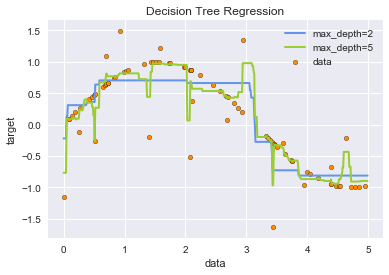

In [42]:
# Adapted from http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = RandomForestRegressor(max_depth=2)
regr_2 = RandomForestRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Random Forest Regression")
plt.legend()

### Gradient Boosting

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
boost_reg = GradientBoostingRegressor()
boost_reg.fit(X_train, np.ravel(y_train))
some_labels['boost_reg'] = boost_reg.predict(some_data)
some_labels

,median_house_value,lin_reg,tree_reg,forest_reg,boost_reg
1862,103100.0,34237.426840,103100.0,102380.0,117670.706405
18832,62000.0,56740.749372,62000.0,63100.0,88325.568957
2488,60400.0,91260.890218,60400.0,60180.0,71236.364819
7637,218800.0,205728.067852,218800.0,221020.0,200150.879187
6941,190300.0,171932.014917,190300.0,186700.0,157175.721458


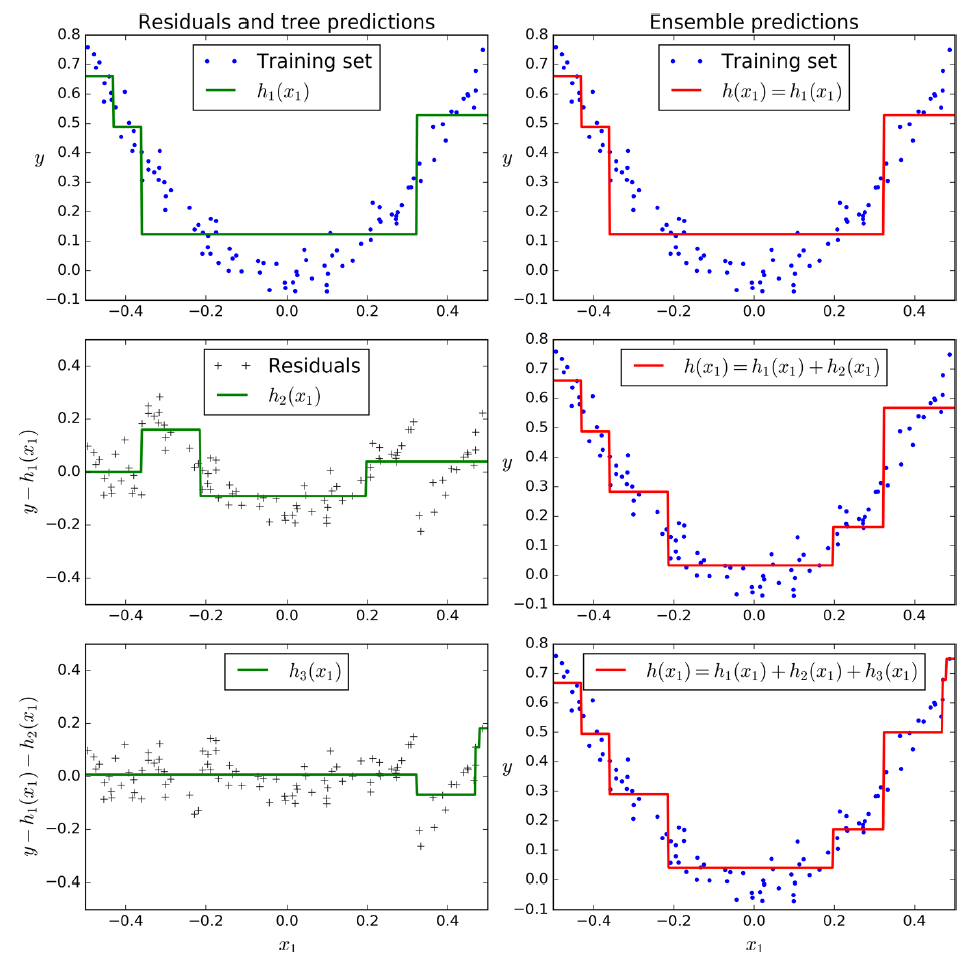

In [15]:
from PIL import Image
path = "/Users/obi/bwSyncAndShare/literature/figs/Geron2017_DS_Fig7-9.png"
display(Image.open(path))

## V.2 Measure and compare their performance

In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X_train, np.ravel(y_train),
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
lin_rmse_scores

array([ 67773.19613269,  69515.91437788,  71190.78995641,  65187.96182696,
        64963.500376  ,  69325.01895368,  69666.52258032,  69287.90589261,
        69855.28360821,  66187.57655787])

In [17]:
lin_rmse_scores.mean(), lin_rmse_scores.std()

(68295.367026263237, 2042.1723511835505)

In [18]:
y_train.mean()

median_house_value    206744.758721
dtype: float64

In [19]:
cv_scores = lambda reg: cross_val_score(reg, X_train, np.ravel(y_train),
                         scoring="neg_mean_squared_error", cv=10)
np.sqrt(-cv_scores(lin_reg))

array([ 67773.19613269,  69515.91437788,  71190.78995641,  65187.96182696,
        64963.500376  ,  69325.01895368,  69666.52258032,  69287.90589261,
        69855.28360821,  66187.57655787])

In [20]:
globals()['lin_reg']

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
# Get names of trained regressors, which follow the naming convention
regressors = [var for var in globals().keys() if var.endswith('_reg')]
regressors

['lin_reg', 'tree_reg', 'forest_reg', 'boost_reg']

In [22]:
scores = dict([(var,np.sqrt(-cv_scores(globals()[var]))) for var in regressors])
scores

{'boost_reg': array([ 53270.86397645,  53212.15858424,  55322.89658227,  51526.75799148,
         51314.28851294,  52780.42043386,  51139.65432449,  53746.17425045,
         53366.90666201,  51681.29641946]),
 'forest_reg': array([ 52496.66253863,  53675.55271465,  53255.02353885,  51962.07610801,
         52970.49855661,  51231.39556482,  52481.23945832,  53163.53304581,
         51968.44233407,  49396.09245942]),
 'lin_reg': array([ 67773.19613269,  69515.91437788,  71190.78995641,  65187.96182696,
         64963.500376  ,  69325.01895368,  69666.52258032,  69287.90589261,
         69855.28360821,  66187.57655787]),
 'tree_reg': array([ 71779.94434108,  69400.71663203,  71454.81114418,  68348.94085663,
         73073.40454893,  72610.73004003,  68037.94318209,  73153.15729246,
         71555.63180698,  68719.61738637])}

In [23]:
performance = pd.DataFrame(scores)
performance

,boost_reg,forest_reg,lin_reg,tree_reg
0,53270.863976,52496.662539,67773.196133,71779.944341
1,53212.158584,53675.552715,69515.914378,69400.716632
2,55322.896582,53255.023539,71190.789956,71454.811144
3,51526.757991,51962.076108,65187.961827,68348.940857
4,51314.288513,52970.498557,64963.500376,73073.404549
5,52780.420434,51231.395565,69325.018954,72610.730040
6,51139.654324,52481.239458,69666.522580,68037.943182
7,53746.174250,53163.533046,69287.905893,73153.157292
8,53366.906662,51968.442334,69855.283608,71555.631807
9,51681.296419,49396.092459,66187.576558,68719.617386


In [24]:
performance.aggregate(['mean', 'std'])

,boost_reg,forest_reg,lin_reg,tree_reg
mean,52736.141774,52260.051632,68295.367026,70813.489723
std,1323.696741,1240.687781,2152.638668,1996.255483


## V.3 Analyze the most significant variables

In [25]:
forest_reg.feature_importances_

array([  5.81977239e-02,   5.51200205e-02,   4.64859896e-02,
         1.30935602e-02,   1.15292061e-02,   1.12697870e-02,
         9.67974231e-03,   4.81237337e-01,   2.80038341e-02,
         1.23483648e-01,   2.31317416e-02,   1.07468931e-03,
         1.34706770e-01,   9.72547322e-05,   6.11794239e-04,
         2.27690135e-03])

In [26]:
importance = pd.DataFrame(dict([(var, globals()[var].feature_importances_) 
                                for var in ['forest_reg', 'boost_reg', 'tree_reg']]),
                          index = X_train.columns)

In [27]:
importance.sort_values(by='forest_reg', ascending=False)

,boost_reg,forest_reg,tree_reg
num_pipeline__median_income,0.177657,0.481237,0.479962
cat_pipeline__INLAND,0.039090,0.134707,0.135192
num_pipeline__population_per_household,0.095256,0.123484,0.121606
num_pipeline__longitude,0.233686,0.058198,0.064463
num_pipeline__latitude,0.189700,0.055120,0.056739
num_pipeline__housing_median_age,0.076164,0.046486,0.043282
num_pipeline__rooms_per_household,0.055093,0.028004,0.028904
num_pipeline__bedrooms_per_room,0.015812,0.023132,0.023715
num_pipeline__total_rooms,0.013192,0.013094,0.010829
num_pipeline__total_bedrooms,0.025246,0.011529,0.011590


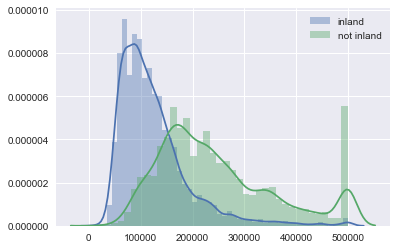

In [28]:
is_inland = X_train.cat_pipeline__INLAND == 1
sns.distplot(y_train[is_inland], label='inland')
sns.distplot(y_train[~is_inland], label='not inland')
plt.legend()

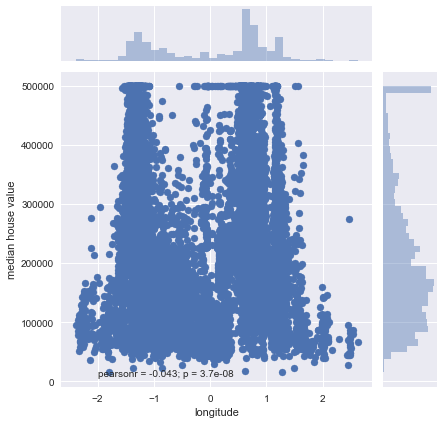

In [29]:
sns.jointplot('longitude', 'median house value',
              data = pd.DataFrame({'longitude': X_train['num_pipeline__longitude'],
                                  'median house value': y_train['median_house_value']})
             )

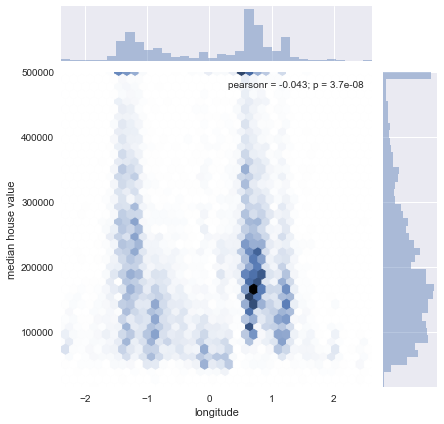

In [30]:
sns.jointplot('longitude', 'median house value',
              data = pd.DataFrame({'longitude': X_train['num_pipeline__longitude'],
                                  'median house value': y_train['median_house_value']}),
              kind='hex'
             )

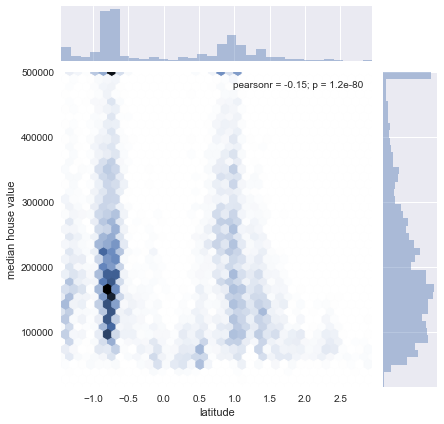

In [31]:
sns.jointplot('latitude', 'median house value',
              data = pd.DataFrame({'latitude': X_train['num_pipeline__latitude'],
                                  'median house value': y_train['median_house_value']}),
              kind='hex'
             )

## V.4 Analyze the types of errors the models make

In [32]:
from sklearn.model_selection import cross_val_predict
out_of_sample = cross_val_predict(forest_reg, X_train, np.ravel(y_train),
                                  cv=10)
out_of_sample.shape

(16512,)

In [33]:
np.ravel(y_train)-out_of_sample

array([ -58180. ,  -17300. ,   -3150. , ..., -112230.2,  -70530. ,  -27930. ])

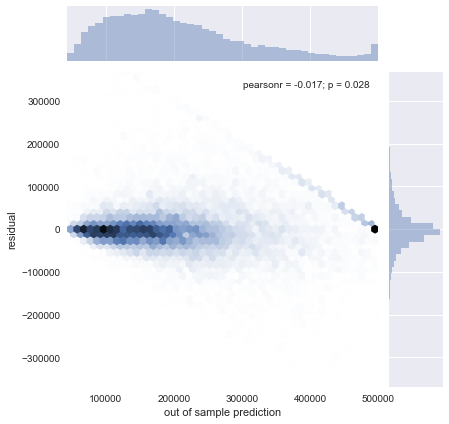

In [34]:
sns.jointplot('out of sample prediction', 'residual',
              data = pd.DataFrame({'out of sample prediction': out_of_sample,
                                  'residual': np.ravel(y_train)-out_of_sample}),
              kind='hex'
             )

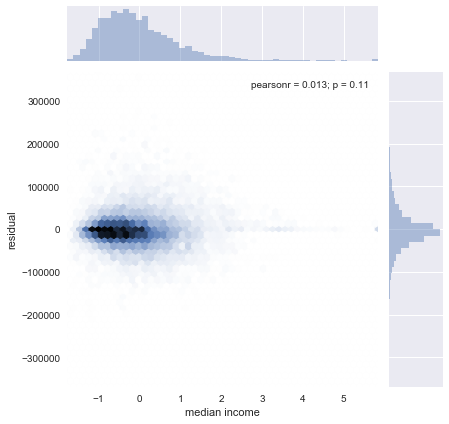

In [35]:
sns.jointplot('median income', 'residual',
              data = pd.DataFrame({'median income': X_train['num_pipeline__median_income'],
                                  'residual': np.ravel(y_train)-out_of_sample}),
              kind='hex'
             )

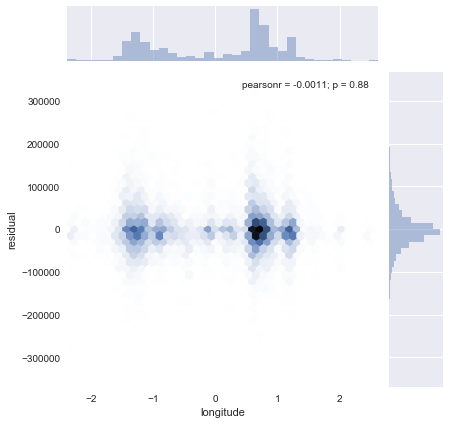

In [36]:
sns.jointplot('longitude', 'residual',
              data = pd.DataFrame({'longitude': X_train['num_pipeline__longitude'],
                                  'residual': np.ravel(y_train)-out_of_sample}),
              kind='hex'
             )

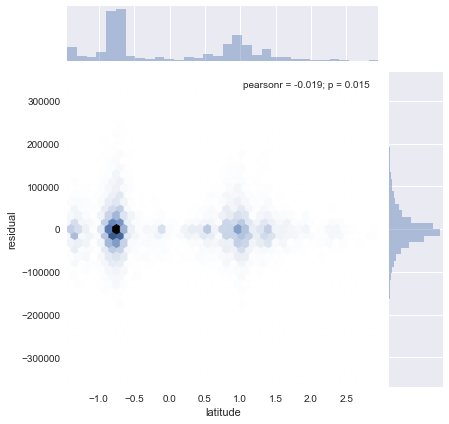

In [37]:
sns.jointplot('latitude', 'residual',
              data = pd.DataFrame({'latitude': X_train['num_pipeline__latitude'],
                                  'residual': np.ravel(y_train)-out_of_sample}),
              kind='hex'
             )

## V.5 Have a quick round of feature selection and engineering

In [38]:
from tsfresh.transformers.feature_selector import FeatureSelector

/Users/obi/02-ProjectSupport/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [39]:
selector = FeatureSelector(test_for_binary_target_real_feature='smir',
                           test_for_real_target_binary_feature='smir')
selector.fit(X_train.values, np.ravel(y_train))

FeatureSelector(chunksize=None, fdr_level=0.05, hypotheses_independent=False,
        ml_task='auto', n_jobs=2,
        test_for_binary_target_binary_feature='fisher',
        test_for_binary_target_real_feature='smir',
        test_for_real_target_binary_feature='smir',
        test_for_real_target_real_feature='kendall')

In [40]:
selector.p_values

array([  0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   5.47572708e-269,   1.48020142e-244,
         4.80649932e-158,   3.26855460e-100,   4.51741890e-060,
         1.51882050e-058,   2.13871222e-048,   6.62564548e-028,
         6.65225584e-024,   1.78902399e-019,   3.84976140e-003,
         5.08493672e-001])

## V.6 Have one or two more quick iterations of the five previous steps

## V.7 Short-list the top three to five most promising models
Prefer models that make different types of errors.